<a href="https://colab.research.google.com/github/VARADHASARASVATHI/GuviProject/blob/main/HousePricingPrediction_Varadharajan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMporting required Packge

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

#Reading the Data set 

In [ ]:
df= pd.read_csv('/content/train-chennai-sale.csv')
df.head(5)


,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


#Reading Dataset

Check the Datatype of each column to ensure that the data saved in the correct Datatype if not, comvert them into the appropriate type

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

* Converting Data type of N_BEDROOM, N_BATHROOM, Date_Sale and Date_Build datatype to right type

#describing the Dataset

In [ ]:
df.describe

<bound method NDFrame.describe of       PRT_ID        AREA  INT_SQFT   DATE_SALE  DIST_MAINROAD  N_BEDROOM  \
0     P03210  Karapakkam      1004  04-05-2011            131        1.0   
1     P09411  Anna Nagar      1986  19-12-2006             26        2.0   
2     P01812       Adyar       909  04-02-2012             70        1.0   
3     P05346   Velachery      1855  13-03-2010             14        3.0   
4     P06210  Karapakkam      1226  05-10-2009             84        1.0   
...      ...         ...       ...         ...            ...        ...   
7104  P03834  Karapakkam       598  03-01-2011             51        1.0   
7105  P10000   Velachery      1897  08-04-2004             52        3.0   
7106  P09594   Velachery      1614  25-08-2006            152        2.0   
7107  P06508  Karapakkam       787  03-08-2009             40        1.0   
7108  P09794   Velachery      1896  13-07-2005            156        3.0   

      N_BATHROOM  N_ROOM    SALE_COND PARK_FACIL  ...

* 7109 rows and  21 columns Data present in the given data set 

#Dropping Unwanted Columns

In [ ]:
df=df.drop(['PRT_ID','COMMIS','REG_FEE'],axis='columns')

##Finding Number of Duplicate value present in each column

In [ ]:
df.isnull().sum()

AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
SALES_PRICE       0
dtype: int64



* Column N_BedRoom, N_Bathroom and QS_OVERALL had Null Values hence we need to correct them



# Converting the duplicate into the right data 

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


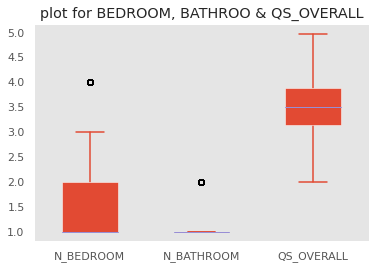

In [ ]:
#finding the outliers to see use which impute to apply here 
plt.style.use('ggplot')
plt.title("plot for BEDROOM, BATHROO & QS_OVERALL")
df.boxplot(column=['N_BEDROOM','N_BATHROOM','QS_OVERALL'],grid=False,widths=0.5,patch_artist=True,boxprops={"facecolor": "C0", "edgecolor": "white",
                          "linewidth": 0.5},
                whiskerprops={"color": "C0", "linewidth": 1.5}, capprops={"color": "C0", "linewidth": 1.5})



Looks like outlier can make some noise if we use Mean hence proposing to use MODE

# Filling the Null dataset into right data using MODE 

In [ ]:
#Imputing the BEDROOM, BATHROOM with MODE as Mean and Mode is not good idea to take 
df=df.fillna({"N_BEDROOM":df["N_BEDROOM"].mode()[0],
           "N_BATHROOM":df["N_BATHROOM"].mode()[0],
           "QS_OVERALL":df["QS_OVERALL"].mean()})
df.isnull().sum()



AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
SALES_PRICE      0
dtype: int64

* now we have clear dataset to proceed further

Updating the right Data Type for the BEDROOM, BATHROOM , DATESALE, DATE BUILD

In [ ]:
df['N_BEDROOM']=df['N_BEDROOM'].astype(int)
df['N_BATHROOM']=df['N_BATHROOM'].astype(int)
df['DATE_SALE']=pd.to_datetime(df['DATE_SALE'])
df['DATE_BUILD']=pd.to_datetime(df['DATE_BUILD'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   AREA           7109 non-null   object        
 1   INT_SQFT       7109 non-null   int64         
 2   DATE_SALE      7109 non-null   datetime64[ns]
 3   DIST_MAINROAD  7109 non-null   int64         
 4   N_BEDROOM      7109 non-null   int64         
 5   N_BATHROOM     7109 non-null   int64         
 6   N_ROOM         7109 non-null   int64         
 7   SALE_COND      7109 non-null   object        
 8   PARK_FACIL     7109 non-null   object        
 9   DATE_BUILD     7109 non-null   datetime64[ns]
 10  BUILDTYPE      7109 non-null   object        
 11  UTILITY_AVAIL  7109 non-null   object        
 12  STREET         7109 non-null   object        
 13  MZZONE         7109 non-null   object        
 14  QS_ROOMS       7109 non-null   float64       
 15  QS_BATHROOM    7109 n

#Correcting Spelling mistake in Data set on few columns

Below Column has the some spelling mistake in the data hence replacing that with original value 
AREA
PARK_FACIL
BUILDTYPE  





In [ ]:
df['AREA'].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

Some Spelling Mistakes present in the AREAS hence converting that into the right 

1.   Karapakkam, Anna Nagar, Adyar, Velachery, Chrompet, KK Nagar, T Nagar has the Duplicate value
2.   Removing and updating the Unique value in Data Frame value

In [ ]:
df=df.replace(to_replace=['Karapakkam','Karapakam'],value='Karapakkam')
df=df.replace(to_replace=['Anna Nagar','Ana Nagar','Ann Nagar'],value='Anna Nagar')
df=df.replace(to_replace=['Adyr'],value='Adyar')
df=df.replace(to_replace=['Velchery'],value='Velachery')
df=df.replace(to_replace=['Chormpet','Chrompt','Chrmpet'],value='Chrompet')
df=df.replace(to_replace=['KKNagar'],value='KK Nagar')
df=df.replace(to_replace=['TNagar'],value='T Nagar')
df['AREA'].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'T Nagar'], dtype=object)

In [ ]:
df['SALE_COND'].unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

In [ ]:
df=df.replace(to_replace=['AbNormal','Ab Normal'],value='Abnormal')
df=df.replace(to_replace=['Partial','Partiall','PartiaLl'],value='Partial')
df=df.replace(to_replace=['Adj Land'],value='AdjLand')
df['SALE_COND'].unique()

array(['Abnormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale'],
      dtype=object)

In [ ]:
df['PARK_FACIL'].unique()

array(['Yes', 'No', 'Noo'], dtype=object)

Some Spellig mistake values present in the PARK FACILITY hence converting that into the right 

1.   No

```
# This is formatted as code
```

 has the some spelling mistake hence corrected



In [ ]:
df['PARK_FACIL']=df['PARK_FACIL'].replace(to_replace=['Noo'],value='No')
df['PARK_FACIL'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
df['UTILITY_AVAIL'].unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa', 'All Pub'], dtype=object)

Some Spellig mistake values present in the  UTILITY AVAILABLE hence converting that into the right 
All Pub has been converted as AllPub

In [ ]:
df['UTILITY_AVAIL']=df['UTILITY_AVAIL'].replace(to_replace=['All Pub'],value='AllPub')
df['UTILITY_AVAIL']=df['UTILITY_AVAIL'].replace(to_replace=['NoSewr '],value='NoSewr')
df['UTILITY_AVAIL'].unique()

array(['AllPub', 'ELO', 'NoSewr', 'NoSeWa'], dtype=object)

* Build Type has some spelling mistakes

In [ ]:
df['BUILDTYPE']=df['BUILDTYPE'].replace(to_replace=['Others'],value='Other')
df['BUILDTYPE']=df['BUILDTYPE'].replace(to_replace=['Comercial'],value='Commercial')
df['BUILDTYPE'].unique()

array(['Commercial', 'Other', 'House'], dtype=object)

* STREET has some spelling mistake hence we need to correct them

In [ ]:
df['STREET']=df['STREET'].replace(to_replace=['Pavd'],value='Paved')
df['STREET']=df['STREET'].replace(to_replace=['NoAccess'],value='No Access')
df['STREET'].unique()

array(['Paved', 'Gravel', 'No Access'], dtype=object)

#Building Age of the House as New Column

In [ ]:
df['age_House']=(pd.to_datetime(df['DATE_SALE']) - pd.to_datetime(df['DATE_BUILD']))/ np.timedelta64(1, 'Y')
df['age_House']=round(df['age_House'])
df['age_House']=df['age_House'].astype(int)
df.head()
#Converting the useful data from DATE_SALES and DATE_BUILD
df['BuildYear'] = df['DATE_SALE'].dt.year
df['SoldYear'] = df['DATE_BUILD'].dt.year
#Drop the date sales, date build
df.drop(['DATE_SALE','DATE_BUILD'],axis=1, inplace=True)


## Finding the Number of House Build on Area Wise to get clarity on the AREA feature

In [ ]:
#Number of house Build AREA wise
df.AREA.value_counts(ascending = True)

T Nagar        501
Adyar          774
Anna Nagar     788
Velachery      981
KK Nagar       997
Karapakkam    1366
Chrompet      1702
Name: AREA, dtype: int64

1.   T Nagar has Minimum bumber of House sold
2.  Chrompet has the Maximum number of House sold

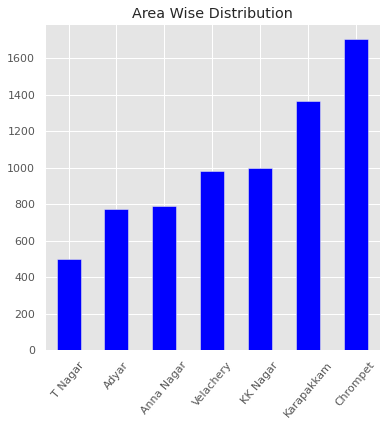

In [ ]:
plt.figure(figsize=(6,6))
plt.title("Area Wise Distribution")
df.AREA.value_counts(ascending = True).plot(kind='bar',color='Blue',alpha=1)
plt.xticks(rotation=50)
plt.show()

Observed that the area total count of the Sales is Lineraly increasing


In [ ]:
df_grpbyArea=df.groupby(["AREA"])['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')
print(df_grpbyArea)

         AREA   SALES_PRICE
4  Karapakkam  7.340100e+06
0       Adyar  9.185668e+06
2    Chrompet  1.001381e+07
6   Velachery  1.104735e+07
3    KK Nagar  1.269623e+07
1  Anna Nagar  1.516820e+07
5     T Nagar  1.561674e+07


# PLOT Sales Price VS AREA

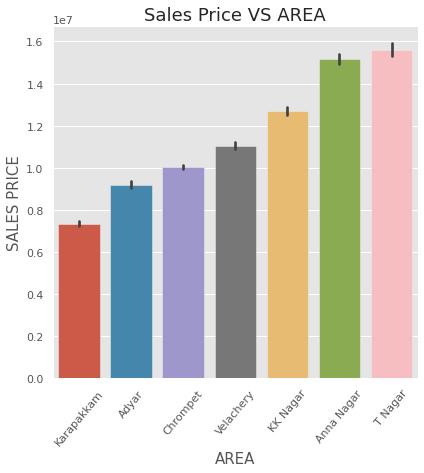

In [ ]:
plt.figure(figsize=(6,6))
plt.title("Sales Price VS AREA", size=18)
sns.barplot(x='AREA',y='SALES_PRICE',data=df, order=df_grpbyArea['AREA'])
plt.xlabel("AREA", size=15)
plt.ylabel("SALES PRICE", size=15)
plt.tight_layout()
plt.xticks(rotation=50)
plt.show()

*   Sales Price increasing based on the Area 
*   Karapakkam has the Minimum Sales Price
*   T Nagar has the maximum sales Price 
*   sales price linearly increasing with respect to area









2015      51
2005     107
2004     116
2006     253
2014     335
2013     365
2007     651
2012     654
2008     814
2009    1122
2011    1300
2010    1341
Name: BuildYear, dtype: int64


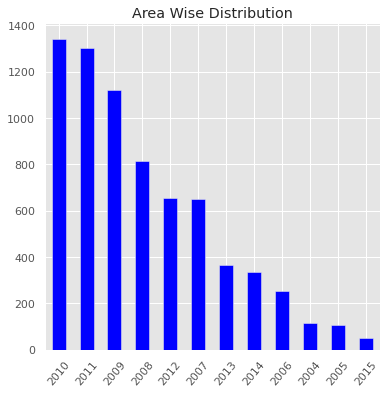

In [ ]:
plt.figure(figsize=(6,6))
plt.title("Area Wise Distribution")
print(df.BuildYear.value_counts(ascending = True))
df.BuildYear.value_counts(ascending = False).plot(kind='bar',color='Blue',alpha=1)
plt.xticks(rotation=50)
plt.show()

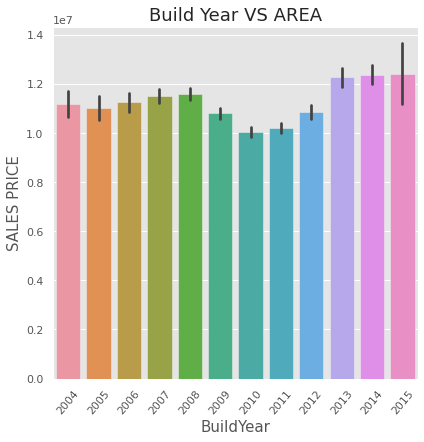

In [ ]:
plt.figure(figsize=(6,6))
plt.title("Build Year VS AREA", size=18)
sns.barplot(x='BuildYear',y='SALES_PRICE',data=df)
plt.xlabel("BuildYear", size=15)
plt.ylabel("SALES PRICE", size=15)
plt.tight_layout()
plt.xticks(rotation=50)
plt.show()

1950      2
1949      2
1951      6
2010      9
1954     11
       ... 
1996    189
1990    191
2002    194
1988    197
1985    200
Name: SoldYear, Length: 62, dtype: int64


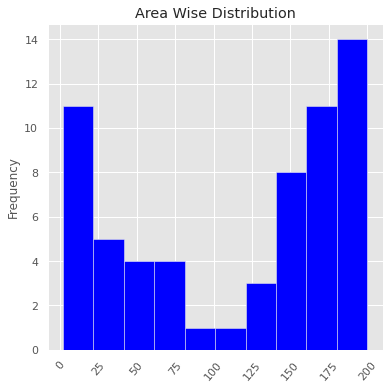

In [ ]:
plt.figure(figsize=(6,6))
plt.title("Area Wise Distribution")
print(df.SoldYear.value_counts(ascending = True))
df.SoldYear.value_counts(ascending = True).plot(kind='hist',color='Blue',alpha=1)
plt.xticks(rotation=50)
plt.show()

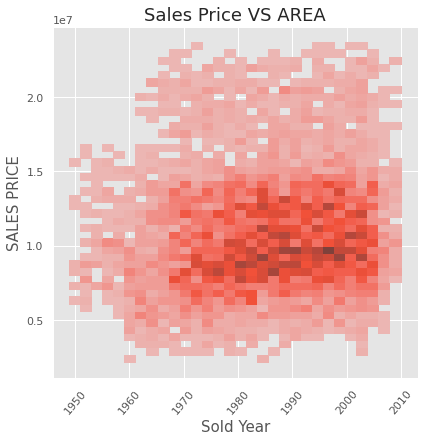

In [ ]:
plt.figure(figsize=(6,6))
plt.title("Sales Price VS AREA", size=18)
sns.histplot(x='SoldYear',y='SALES_PRICE',data=df)
plt.xlabel("Sold Year", size=15)
plt.ylabel("SALES PRICE", size=15)
plt.tight_layout()
plt.xticks(rotation=50)
plt.show()

# Square Feet  VS SALES_PRICE

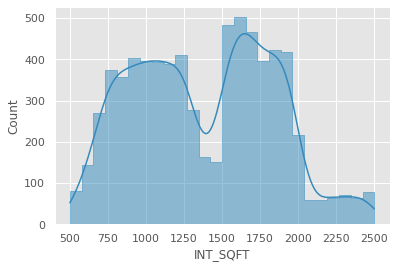

In [ ]:
sns.histplot(data=df, x="INT_SQFT", kde=True, element="step")

Minimum square feet is 500

Maximum square feet is 2500


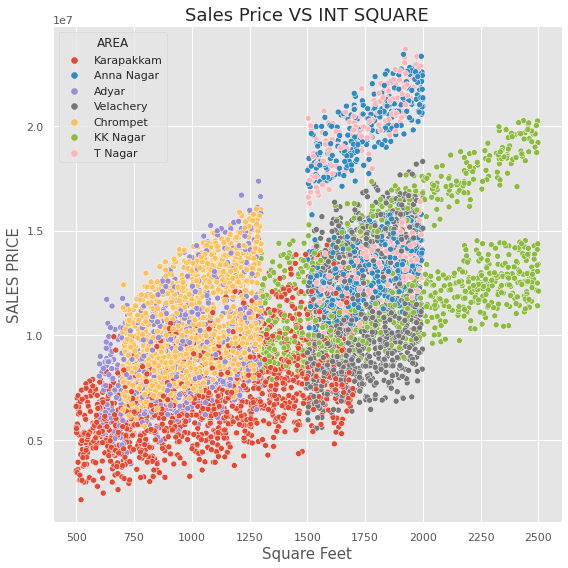

In [ ]:
plt.figure(figsize=(8,8))
plt.title("Sales Price VS INT SQUARE", size=18)
sns.scatterplot(x='INT_SQFT',y='SALES_PRICE',data=df, hue="AREA")
plt.xlabel("Square Feet", size=15)
plt.ylabel("SALES PRICE", size=15)
plt.tight_layout()
plt.show()

There is stright line relation between Sales Price Vs Int Squeare Feet

KK Nagar has the More Square feet houses than any other area

Karapakkam has the less square feet Houses 


# DISTANCE FROM MAINROAD  

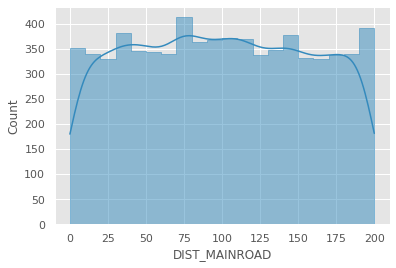

In [ ]:
sns.histplot(data=df, x="DIST_MAINROAD", kde=True, element="step")

* maximum building are so far away from main road

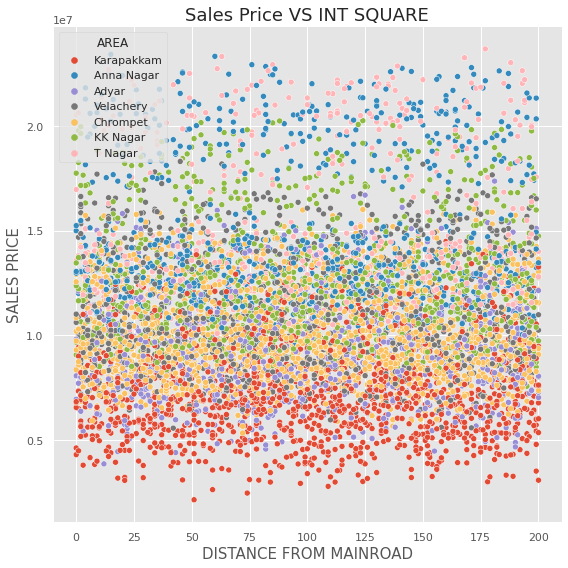

In [ ]:
plt.figure(figsize=(8,8))
plt.title("Sales Price VS INT SQUARE", size=18)
sns.scatterplot(x='DIST_MAINROAD',y='SALES_PRICE',data=df, hue="AREA")
plt.xlabel("DISTANCE FROM MAINROAD", size=15)
plt.ylabel("SALES PRICE", size=15)
plt.tight_layout()
plt.show()

* There is no changes in increasing sales price when DIstance from Main road is increase hence we can drop this feature as its not so much depended on Target Varialble alos There is uniform distribution hence we can drop this feature

## N_BEDROOM VS SALES PRICE

1    3796
2    2352
3     707
4     254
Name: N_BEDROOM, dtype: int64
Max bed rooms: 4
Min bed rooms: 1


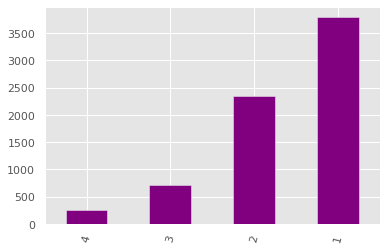

In [ ]:
#Check the count of N Bedroom
print(df['N_BEDROOM'].value_counts())
print("Max bed rooms:",df['N_BEDROOM'].max())
print("Min bed rooms:",df['N_BEDROOM'].min())
df.N_BEDROOM.value_counts(ascending = True).plot(kind='bar',color='purple',alpha=1.0)
plt.xticks(rotation=75)
plt.show()

* Max bed rooms: 4 - 254 houses sold with 4 Bed rooms 
* Min bed rooms: 1 - 3796 Houses sold with 1 bed rooms
* single BED ROOM house sold more than others

N_BEDROOM VS SALES PRICE Comparison

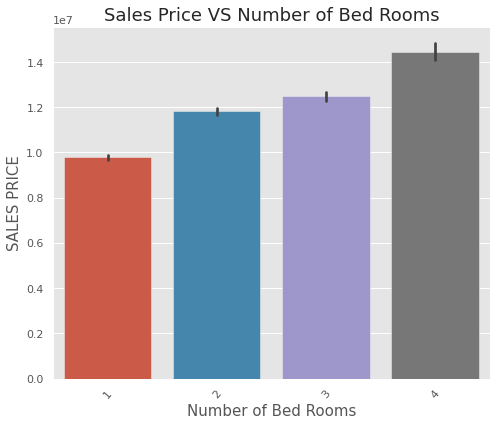

In [ ]:
plt.figure(figsize=(7,6))
plt.title("Sales Price VS Number of Bed Rooms", size=18)
sns.barplot(x='N_BEDROOM',y='SALES_PRICE',data=df)
plt.xlabel("Number of Bed Rooms", size=15)
plt.ylabel("SALES PRICE", size=15)
plt.tight_layout()
plt.xticks(rotation=50)
plt.show()

* There is differense in Sales Price based on Number of Bed rooms but not linearly changes exactly 
* When Number of Bed Rooms increase sales price is also increasing

## N_BATHROOM  VS SALES PRICE      

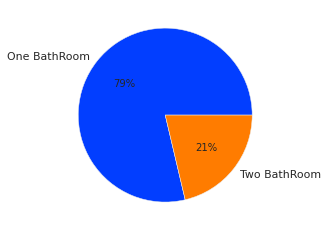

In [ ]:
data=df['N_BATHROOM'].value_counts()
labels = ['One BathRoom', 'Two BathRoom']
colors = sns.color_palette('bright')[0:5]
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

* Major house solded has single Bath Room - 79% 

* Number Bath Rooms Vs SALES PRICE

1    5594
2    1515
Name: N_BATHROOM, dtype: int64


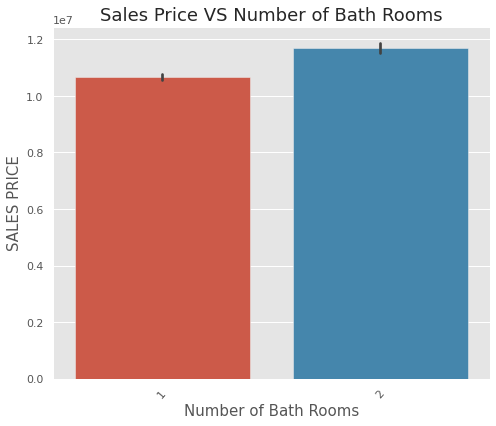

In [ ]:
plt.figure(figsize=(7,6))
plt.title("Sales Price VS Number of Bath Rooms", size=18)
count=df['N_BATHROOM'].value_counts()
print(count)
sns.barplot(x='N_BATHROOM',y='SALES_PRICE',data=df)
plt.xlabel("Number of Bath Rooms", size=15)
plt.ylabel("SALES PRICE", size=15)
plt.tight_layout()
plt.xticks(rotation=50)
plt.show()

* There is differense in Sales Price based on Number of Bath rooms linearly
* When Number of Bath Rooms increase sales price is also slightly increasing

## Number of Room VS Sales PRICE

In [ ]:
df['N_ROOM'].unique()

array([3, 5, 4, 2, 6])

* Maximum Number of room : 6
* minimum Number of Room : 2

In [ ]:
#Total Number house sold based on the Number of Rooms
df['N_ROOM'].value_counts()

4    2563
3    2125
5    1246
2     921
6     254
Name: N_ROOM, dtype: int64

* Majority of the House sold has 4 Bed rooms followed by 3, 5



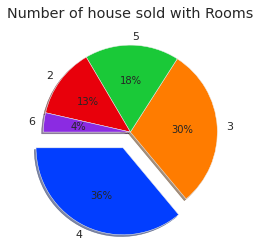

In [ ]:
colors = sns.color_palette('bright')[0:5]
plt.title("Number of house sold with Rooms")
explode = [0.2, 0, 0, 0, 0]
df['N_ROOM'].value_counts().plot(kind='pie',colors=colors, autopct='%.0f%%',label="",explode = explode,shadow = True,
          startangle = 180)

* Majority of the House sold has 4 Bed rooms followed by 3, 5

36% - 4 Rooms -maximum 

4% - 6 Roomns - Minimum



 * ROOMS VS SALES PRICE

4    2563
3    2125
5    1246
2     921
6     254
Name: N_ROOM, dtype: int64


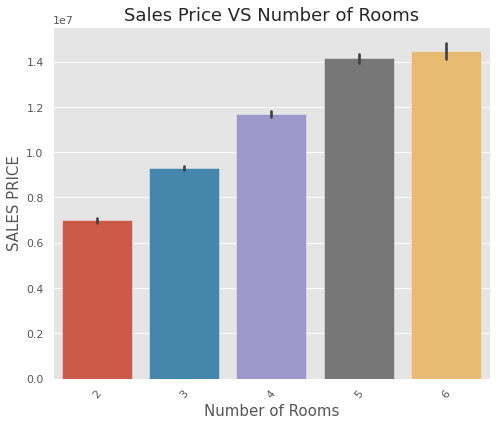

In [ ]:
# ROOMS VS SALES PRICE
plt.figure(figsize=(7,6))
plt.title("Sales Price VS Number of Rooms", size=18)
count=df['N_ROOM'].value_counts()
print(count)
sns.barplot(x='N_ROOM',y='SALES_PRICE',data=df)
plt.xlabel("Number of Rooms", size=15)
plt.ylabel("SALES PRICE", size=15)
plt.tight_layout()
plt.xticks(rotation=50)
plt.show()

* Number Of Rooms increase tends to increasing Sales PRICE lineraly 
* 2 bed room house has least sales price 
* 6 bed room houses has high slaes price

## SALES CONDITION 

Count of house SALES CONDITION:  ['Abnormal' 'Family' 'Partial' 'AdjLand' 'Normal Sale']


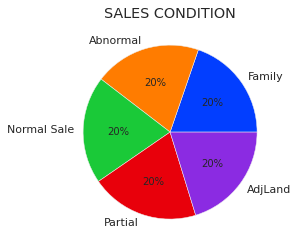

In [ ]:
print("Count of house SALES CONDITION: ",df['SALE_COND'].unique())
colors = sns.color_palette('bright')[0:5]
plt.title("SALES CONDITION")
df['SALE_COND'].value_counts(ascending=True).plot(kind='pie',colors=colors, autopct='%.0f%%',label="")

* Sales Condition was more are less equaly shared among all the condition

     SALE_COND   SALES_PRICE
4      Partial  1.061637e+07
2       Family  1.073642e+07
0     Abnormal  1.091463e+07
3  Normal Sale  1.099418e+07
1      AdjLand  1.120931e+07


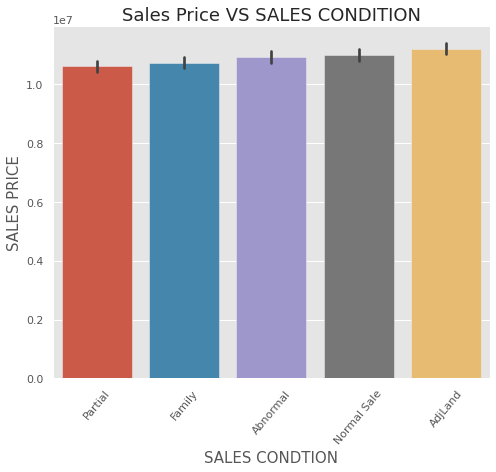

In [ ]:
# SALES CONDITION VS SALES PRICE
df_grpbySaleCond=df.groupby(["SALE_COND"])['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')
plt.figure(figsize=(7,6))
plt.title("Sales Price VS SALES CONDITION", size=18)
count=df['SALE_COND'].value_counts()
print(df_grpbySaleCond)
sns.barplot(x='SALE_COND',y='SALES_PRICE',data=df,order=df_grpbySaleCond['SALE_COND'])
plt.xlabel("SALES CONDTION", size=15)
plt.ylabel("SALES PRICE", size=15)
plt.tight_layout()
plt.xticks(rotation=50)
plt.show()

* There is small linear relationship between SALES CONDITION and SALES PRICE 
* AdjLand has the high SALES PRICE 
* Partial has the low value
* we need to Label encoding as its catgorical Data with linear relation

## PARKING FACILITY        

In [ ]:
# Total Number house solded with/Without Parking Faciltiy 
print("Total Number house solded with/Without Parking Faciltiy \n",df['PARK_FACIL'].value_counts())

Total Number house solded with/Without Parking Faciltiy 
 Yes    3587
No     3522
Name: PARK_FACIL, dtype: int64


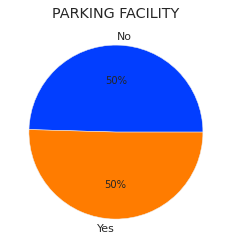

In [ ]:
colors = sns.color_palette('bright')[0:5]
plt.title("PARKING FACILITY")
df['PARK_FACIL'].value_counts(ascending=True).plot(kind='pie',colors=colors, autopct='%.0f%%',label="")

* Aproximatley 50 % of the house sold has parking faciltiy 

  PARK_FACIL   SALES_PRICE
0         No  1.033805e+07
1        Yes  1.144168e+07


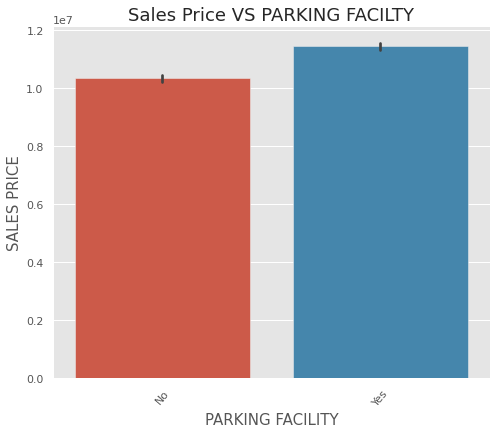

In [ ]:
df_grpbyparkfacy=df.groupby(["PARK_FACIL"])['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')
plt.figure(figsize=(7,6))
plt.title("Sales Price VS PARKING FACILTY", size=18)
count=df['PARK_FACIL'].value_counts()
print(df_grpbyparkfacy)
sns.barplot(x='PARK_FACIL',y='SALES_PRICE',data=df,order=df_grpbyparkfacy['PARK_FACIL'])
plt.xlabel("PARKING FACILITY", size=15)
plt.ylabel("SALES PRICE", size=15)
plt.tight_layout()
plt.xticks(rotation=50)
plt.show()

* There is small linear relationship between PARKING FACILITY and SALES PRICE 
* there is changes in sales price with respect to Parking Facility 

## BUILDTYPE VS SALES PRICE

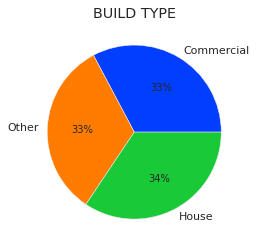

In [ ]:
df['BUILDTYPE'].unique()
colors = sns.color_palette('bright')[0:5]
plt.title("BUILD TYPE")
df['BUILDTYPE'].value_counts(ascending=True).plot(kind='pie',colors=colors, autopct='%.0f%%',label="")

* More Number of Houses sold than other build type 


House         2444
Other         2336
Commercial    2329
Name: BUILDTYPE, dtype: int64


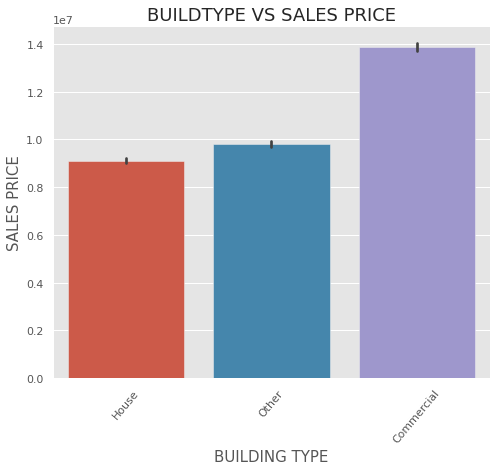

In [ ]:
df_grpbybuildtypeCond=df.groupby(["BUILDTYPE"])['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')
plt.figure(figsize=(7,6))
plt.title("BUILDTYPE VS SALES PRICE", size=18)
count=df['BUILDTYPE'].value_counts()
print(count)
sns.barplot(x='BUILDTYPE',y='SALES_PRICE',data=df,order=df_grpbybuildtypeCond['BUILDTYPE'])
plt.xlabel("BUILDING TYPE", size=15)
plt.ylabel("SALES PRICE", size=15)
plt.tight_layout()
plt.xticks(rotation=50)
plt.show()

* SALES PRICE varies for different building type 
* Commercial build type has high value of sales price than house and other
* There is no Linear relation ship between buildtype and Sales  price hence we need to use one hot encoding 

## UTILITY_AVAILABLE     

Utility Available 
 ELO       1522
NoSewr    1829
NoSeWa    1871
AllPub    1887
Name: UTILITY_AVAIL, dtype: int64


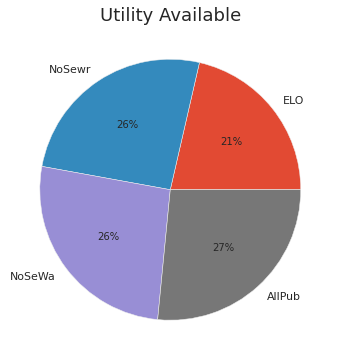

In [ ]:
print("Utility Available \n", df['UTILITY_AVAIL'].value_counts(ascending=True))
plt.figure(figsize=(7,6))
plt.title("Utility Available", size=18)
df['UTILITY_AVAIL'].value_counts(ascending=True).plot(kind='pie',label="", autopct='%.0f%%')


* More Houses sold has the All Pub utility than other utility 

  UTILITY_AVAIL   SALES_PRICE
1           ELO  1.046941e+07
2        NoSeWa  1.089308e+07
3        NoSewr  1.092576e+07
0        AllPub  1.121002e+07


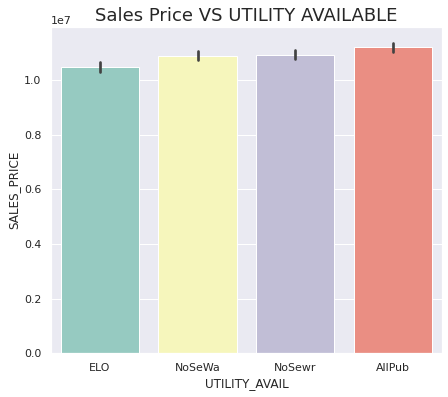

In [ ]:
df_grpbyutilityAvaiCond=df.groupby(["UTILITY_AVAIL"])['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')
print(df_grpbyutilityAvaiCond)
plt.figure(figsize=(7,6))
sns.set_theme(style="darkgrid")
plt.title("Sales Price VS UTILITY AVAILABLE", size=18)
sns.barplot(x='UTILITY_AVAIL',y='SALES_PRICE',data=df,order=df_grpbyutilityAvaiCond['UTILITY_AVAIL'], palette="Set3")

* Sales price varies for different utility available 
* There is linear relation b/w Sales Price and utility available 
* we should use Label Encoding


## STREET TYPE

Street type count 
 No Access    2017
Gravel       2520
Paved        2572
Name: STREET, dtype: int64


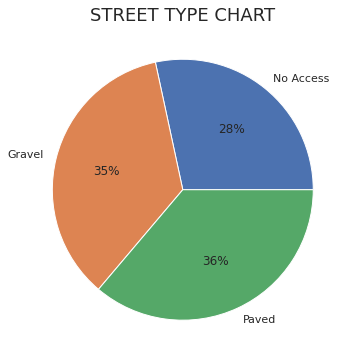

In [ ]:
print("Street type count \n", df['STREET'].value_counts(ascending=True))
plt.figure(figsize=(7,6))
plt.title("STREET TYPE CHART", size=18)
df['STREET'].value_counts(ascending=True).plot(kind='pie',label="", autopct='%.0f%%')

* More house sold has Paved Street than other street type 

      STREET   SALES_PRICE
1  No Access  1.000074e+07
2      Paved  1.105754e+07
0     Gravel  1.144462e+07


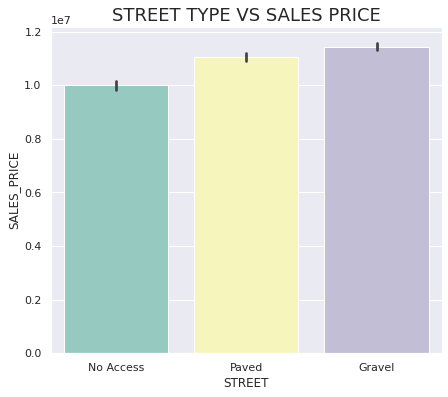

In [ ]:
df_grpbyStreet=df.groupby(["STREET"])['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')
print(df_grpbyStreet)
plt.figure(figsize=(7,6))
sns.set_theme(style="darkgrid")
plt.title("STREET TYPE VS SALES PRICE", size=18)
sns.barplot(x='STREET',y='SALES_PRICE',data=df,order=df_grpbyStreet['STREET'], palette="Set3")

* Sales price increasing lineraly based on the Street type 
* Sales Price and Street has linear relation
* We need to use Label Encoding 


## MZZONE

MZ ZONE treet type count 
 I      525
A      537
C      550
RM    1817
RH    1822
RL    1858
Name: MZZONE, dtype: int64


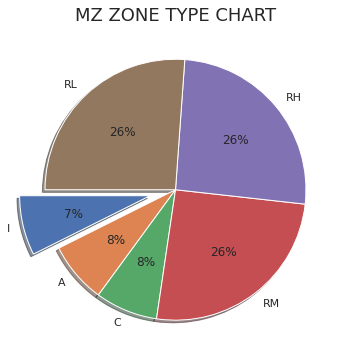

In [ ]:
print("MZ ZONE treet type count \n", df['MZZONE'].value_counts(ascending=True))
plt.figure(figsize=(7,6))
explode = [0.2, 0, 0, 0, 0,0]
plt.title("MZ ZONE TYPE CHART", size=18)
df['MZZONE'].value_counts(ascending=True).plot(kind='pie',label="", autopct='%.0f%%',explode=explode,shadow = True,
          startangle = 180)

* ZONE I has sold less number of house
* ZONE RL, RH and RM has more houses solded

  MZZONE   SALES_PRICE
0      A  7.292591e+06
1      C  8.052270e+06
2      I  8.738633e+06
3     RH  1.103997e+07
4     RL  1.176576e+07
5     RM  1.240707e+07


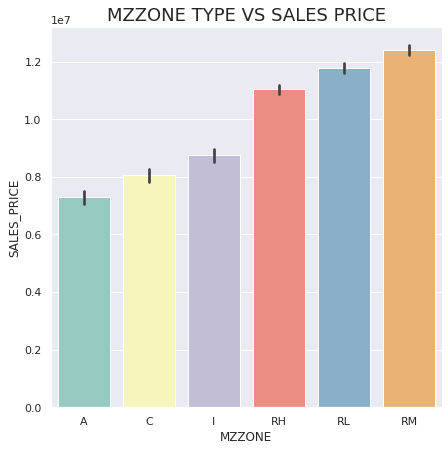

In [ ]:
df_grpbyZone=df.groupby(["MZZONE"])['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')
print(df_grpbyZone)
plt.figure(figsize=(7,7))
sns.set_theme(style="darkgrid")
plt.title("MZZONE TYPE VS SALES PRICE", size=18)
sns.barplot(x='MZZONE',y='SALES_PRICE',data=df,order=df_grpbyZone['MZZONE'], palette="Set3")

* ZONE A has less sales price 
* Zone RM has the high sales price 
* There is linear relation between Sales Price and MZZONE hence we need to use one  hot encoding

## QS_ROOM

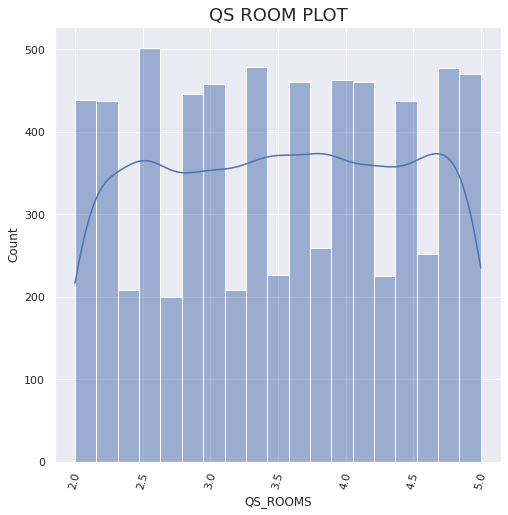

In [ ]:
plt.figure(figsize=(8,8))
plt.title("QS ROOM PLOT", size=18)
sns.histplot(data=df, x="QS_ROOMS",kde=True)
plt.xticks(rotation=75)
plt.show()

* QS ROOMS has uniform distrubtion hence we need drop the *feature*

## QS_BATHROOM

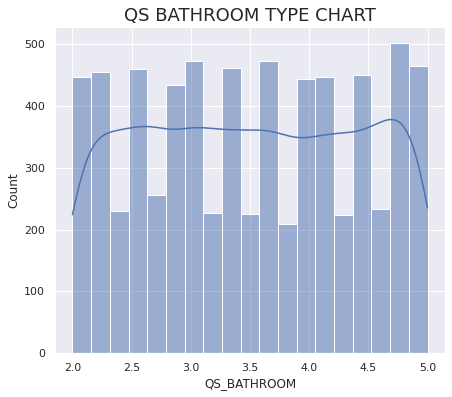

In [ ]:
plt.figure(figsize=(7,6))
plt.title("QS BATHROOM TYPE CHART", size=18)
sns.histplot(data=df, x="QS_BATHROOM",kde=True)

* QS ROOMS has uniform distrubtion hence we need drop the *feature*

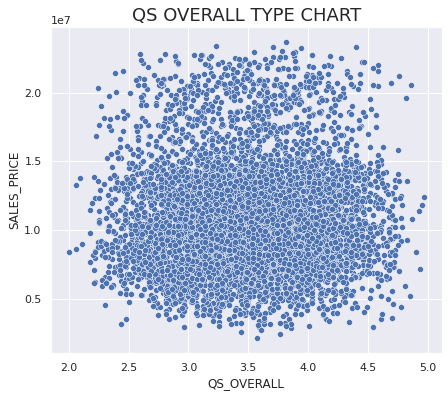

In [ ]:
plt.figure(figsize=(7,6))
plt.title("QS OVERALL TYPE CHART", size=18)
sns.scatterplot(data=df, x="QS_OVERALL",y="SALES_PRICE")

* QS OVERALL has uniform distrubtion hence we need drop the *feature*

## AGE OF THE HOUSE VS SALES PRICE

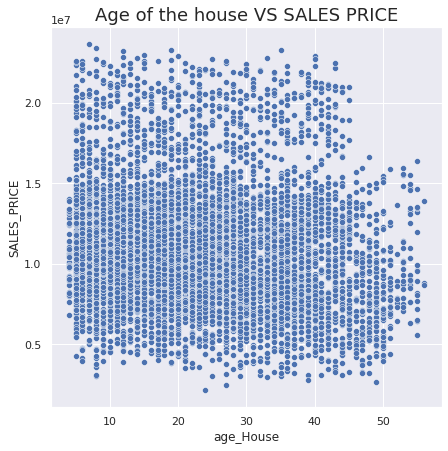

In [ ]:
plt.figure(figsize=(7,7))
df.age_House.count()
sns.set_theme(style="darkgrid")
plt.title("Age of the house VS SALES PRICE", size=18)
sns.scatterplot(x='age_House',y='SALES_PRICE',data=df)

# ENCODING THE CATEGORICAL DATAs

**AREA**

In [ ]:
df['AREA'].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'T Nagar'], dtype=object)

In [ ]:
#Label Enoding the AREA Feature
df['AREA']= df['AREA'].map({"Karapakkam": 1,"Adyar": 2,"Chrompet": 3,"Velachery": 4,"KK Nagar": 5,"Anna Nagar": 6,"T Nagar": 7})
df.head()



,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,age_House,BuildYear,SoldYear
0,1,1004,131,1,1,3,Abnormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,44,2011,1967
1,6,1986,26,2,1,5,Abnormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,11,2006,1995
2,2,909,70,1,1,3,Abnormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,20,2012,1992
3,4,1855,14,3,2,5,Family,No,Other,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290,22,2010,1988
4,1,1226,84,1,1,3,Abnormal,Yes,Other,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,30,2009,1979


# SALE_COND

In [ ]:
df['SALE_COND'].unique()

array(['Abnormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale'],
      dtype=object)

In [ ]:
#Label Enoding the SALES CONDITION Feature
df['SALE_COND']= df['SALE_COND'].map({"Partial": 1,"Family": 2,"Abnormal": 3,"Normal Sale": 4,"AdjLand": 5})
df.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,age_House,BuildYear,SoldYear
0,1,1004,131,1,1,3,3,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,44,2011,1967
1,6,1986,26,2,1,5,3,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,11,2006,1995
2,2,909,70,1,1,3,3,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,20,2012,1992
3,4,1855,14,3,2,5,2,No,Other,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290,22,2010,1988
4,1,1226,84,1,1,3,3,Yes,Other,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,30,2009,1979


# PARK FACILITY

In [ ]:
df['PARK_FACIL'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
#Label Enoding the PARK FACILITY CONDITION Feature
df['PARK_FACIL']= df['PARK_FACIL'].map({"No": 1,"Yes": 2})
df.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,age_House,BuildYear,SoldYear
0,1,1004,131,1,1,3,3,2,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,44,2011,1967
1,6,1986,26,2,1,5,3,1,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,11,2006,1995
2,2,909,70,1,1,3,3,2,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,20,2012,1992
3,4,1855,14,3,2,5,2,1,Other,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290,22,2010,1988
4,1,1226,84,1,1,3,3,2,Other,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,30,2009,1979


## UTILITY_AVAIL

In [ ]:
df['UTILITY_AVAIL'].unique()
df.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,age_House,BuildYear,SoldYear
0,1,1004,131,1,1,3,3,2,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,44,2011,1967
1,6,1986,26,2,1,5,3,1,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,11,2006,1995
2,2,909,70,1,1,3,3,2,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,20,2012,1992
3,4,1855,14,3,2,5,2,1,Other,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290,22,2010,1988
4,1,1226,84,1,1,3,3,2,Other,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,30,2009,1979


In [ ]:
#Label Enoding the SALES CONDITION Feature
df['UTILITY_AVAIL']= df['UTILITY_AVAIL'].map({"ELO": 1,"NoSeWa": 2,"NoSewr": 3,"AllPub": 4})
df.head()


,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,age_House,BuildYear,SoldYear
0,1,1004,131,1,1,3,3,2,Commercial,4,Paved,A,4.0,3.9,4.9,4.330,7600000,44,2011,1967
1,6,1986,26,2,1,5,3,1,Commercial,4,Gravel,RH,4.9,4.2,2.5,3.765,21717770,11,2006,1995
2,2,909,70,1,1,3,3,2,Commercial,1,Gravel,RL,4.1,3.8,2.2,3.090,13159200,20,2012,1992
3,4,1855,14,3,2,5,2,1,Other,3,Paved,I,4.7,3.9,3.6,4.010,9630290,22,2010,1988
4,1,1226,84,1,1,3,3,2,Other,4,Gravel,C,3.0,2.5,4.1,3.290,7406250,30,2009,1979


In [ ]:
df['UTILITY_AVAIL'].isnull().sum()

0

## STREET

In [ ]:
df['STREET'].unique()
df['STREET']= df['STREET'].map({"No Access": 1,"Paved": 2,"Gravel": 3})
df.head()


,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,age_House,BuildYear,SoldYear
0,1,1004,131,1,1,3,3,2,Commercial,4,2,A,4.0,3.9,4.9,4.330,7600000,44,2011,1967
1,6,1986,26,2,1,5,3,1,Commercial,4,3,RH,4.9,4.2,2.5,3.765,21717770,11,2006,1995
2,2,909,70,1,1,3,3,2,Commercial,1,3,RL,4.1,3.8,2.2,3.090,13159200,20,2012,1992
3,4,1855,14,3,2,5,2,1,Other,3,2,I,4.7,3.9,3.6,4.010,9630290,22,2010,1988
4,1,1226,84,1,1,3,3,2,Other,4,3,C,3.0,2.5,4.1,3.290,7406250,30,2009,1979


In [ ]:
df['MZZONE'].unique()
df['MZZONE']= df['MZZONE'].map({"A": 1,"C": 2,"I": 3,"RH": 4,"RL": 5,"RM": 6})
df.head()


,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,age_House,BuildYear,SoldYear
0,1,1004,131,1,1,3,3,2,Commercial,4,2,1,4.0,3.9,4.9,4.330,7600000,44,2011,1967
1,6,1986,26,2,1,5,3,1,Commercial,4,3,4,4.9,4.2,2.5,3.765,21717770,11,2006,1995
2,2,909,70,1,1,3,3,2,Commercial,1,3,5,4.1,3.8,2.2,3.090,13159200,20,2012,1992
3,4,1855,14,3,2,5,2,1,Other,3,2,3,4.7,3.9,3.6,4.010,9630290,22,2010,1988
4,1,1226,84,1,1,3,3,2,Other,4,3,2,3.0,2.5,4.1,3.290,7406250,30,2009,1979


## BUILDTYPE


In [ ]:
df=pd.get_dummies(df)
df.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,...,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,age_House,BuildYear,SoldYear,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Other
0,1,1004,131,1,1,3,3,2,4,2,...,3.9,4.9,4.330,7600000,44,2011,1967,1,0,0
1,6,1986,26,2,1,5,3,1,4,3,...,4.2,2.5,3.765,21717770,11,2006,1995,1,0,0
2,2,909,70,1,1,3,3,2,1,3,...,3.8,2.2,3.090,13159200,20,2012,1992,1,0,0
3,4,1855,14,3,2,5,2,1,3,2,...,3.9,3.6,4.010,9630290,22,2010,1988,0,0,1
4,1,1226,84,1,1,3,3,2,4,3,...,2.5,4.1,3.290,7406250,30,2009,1979,0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AREA                  7109 non-null   int64  
 1   INT_SQFT              7109 non-null   int64  
 2   DIST_MAINROAD         7109 non-null   int64  
 3   N_BEDROOM             7109 non-null   int64  
 4   N_BATHROOM            7109 non-null   int64  
 5   N_ROOM                7109 non-null   int64  
 6   SALE_COND             7109 non-null   int64  
 7   PARK_FACIL            7109 non-null   int64  
 8   UTILITY_AVAIL         7109 non-null   int64  
 9   STREET                7109 non-null   int64  
 10  MZZONE                7109 non-null   int64  
 11  QS_ROOMS              7109 non-null   float64
 12  QS_BATHROOM           7109 non-null   float64
 13  QS_BEDROOM            7109 non-null   float64
 14  QS_OVERALL            7109 non-null   float64
 15  SALES_PRICE          

In [ ]:
df.isna().sum()

AREA                    0
INT_SQFT                0
DIST_MAINROAD           0
N_BEDROOM               0
N_BATHROOM              0
N_ROOM                  0
SALE_COND               0
PARK_FACIL              0
UTILITY_AVAIL           0
STREET                  0
MZZONE                  0
QS_ROOMS                0
QS_BATHROOM             0
QS_BEDROOM              0
QS_OVERALL              0
SALES_PRICE             0
age_House               0
BuildYear               0
SoldYear                0
BUILDTYPE_Commercial    0
BUILDTYPE_House         0
BUILDTYPE_Other         0
dtype: int64

In [ ]:
df.corr()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,...,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,age_House,BuildYear,SoldYear,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Other
AREA,1.000000,0.685243,0.003487,0.320889,-0.044401,0.644971,-0.001571,0.007916,0.049250,0.071459,...,0.002351,0.004147,0.017745,0.694149,-0.072690,-0.022809,0.066407,0.012488,-0.013170,0.000839
INT_SQFT,0.685243,1.000000,0.002022,0.786263,0.515290,0.951279,0.004029,0.004618,0.068096,0.091727,...,-0.008337,0.008865,0.013989,0.612125,-0.013257,-0.123840,-0.009301,0.008927,-0.006848,-0.001995
DIST_MAINROAD,0.003487,0.002022,1.000000,-0.002723,0.001850,0.002301,-0.009342,-0.009448,-0.007112,0.001942,...,-0.029468,0.001554,-0.017255,0.018783,-0.003911,0.012821,0.005706,0.022109,-0.019417,-0.002458
N_BEDROOM,0.320889,0.786263,-0.002723,1.000000,0.755207,0.840209,0.006868,-0.009357,0.084271,0.117058,...,-0.007534,0.015752,0.014245,0.330987,-0.046251,-0.185263,0.012421,-0.000534,0.004914,-0.004435
N_BATHROOM,-0.044401,0.515290,0.001850,0.755207,1.000000,0.568541,0.010695,-0.014033,0.050504,0.071575,...,-0.012043,0.013191,0.007961,0.108834,-0.020363,-0.105395,0.001514,-0.006099,0.018195,-0.012305
N_ROOM,0.644971,0.951279,0.002301,0.840209,0.568541,1.000000,0.000969,-0.000934,0.063340,0.089961,...,-0.007545,0.015072,0.015418,0.602760,-0.034009,-0.109391,0.013409,0.008826,-0.005288,-0.003472
SALE_COND,-0.001571,0.004029,-0.009342,0.006868,0.010695,0.000969,1.000000,0.003936,-0.010606,-0.002525,...,0.004049,0.003840,0.001542,0.054370,0.011103,-0.001509,-0.011034,-0.005805,-0.000835,0.006645
PARK_FACIL,0.007916,0.004618,-0.009448,-0.009357,-0.014033,-0.000934,0.003936,1.000000,-0.030558,-0.000990,...,-0.011935,-0.001165,-0.009601,0.146428,-0.009722,-0.004268,0.008042,0.010702,-0.010172,-0.000407
UTILITY_AVAIL,0.049250,0.068096,-0.007112,0.084271,0.050504,0.063340,-0.010606,-0.030558,1.000000,0.038551,...,-0.017148,0.016026,0.005474,0.064418,-0.039168,0.015814,0.041194,0.025137,-0.000541,-0.024570
STREET,0.071459,0.091727,0.001942,0.117058,0.071575,0.089961,-0.002525,-0.000990,0.038551,1.000000,...,0.003555,0.023809,0.015015,0.149589,-0.040218,-0.010530,0.036710,-0.013480,0.014170,-0.000860


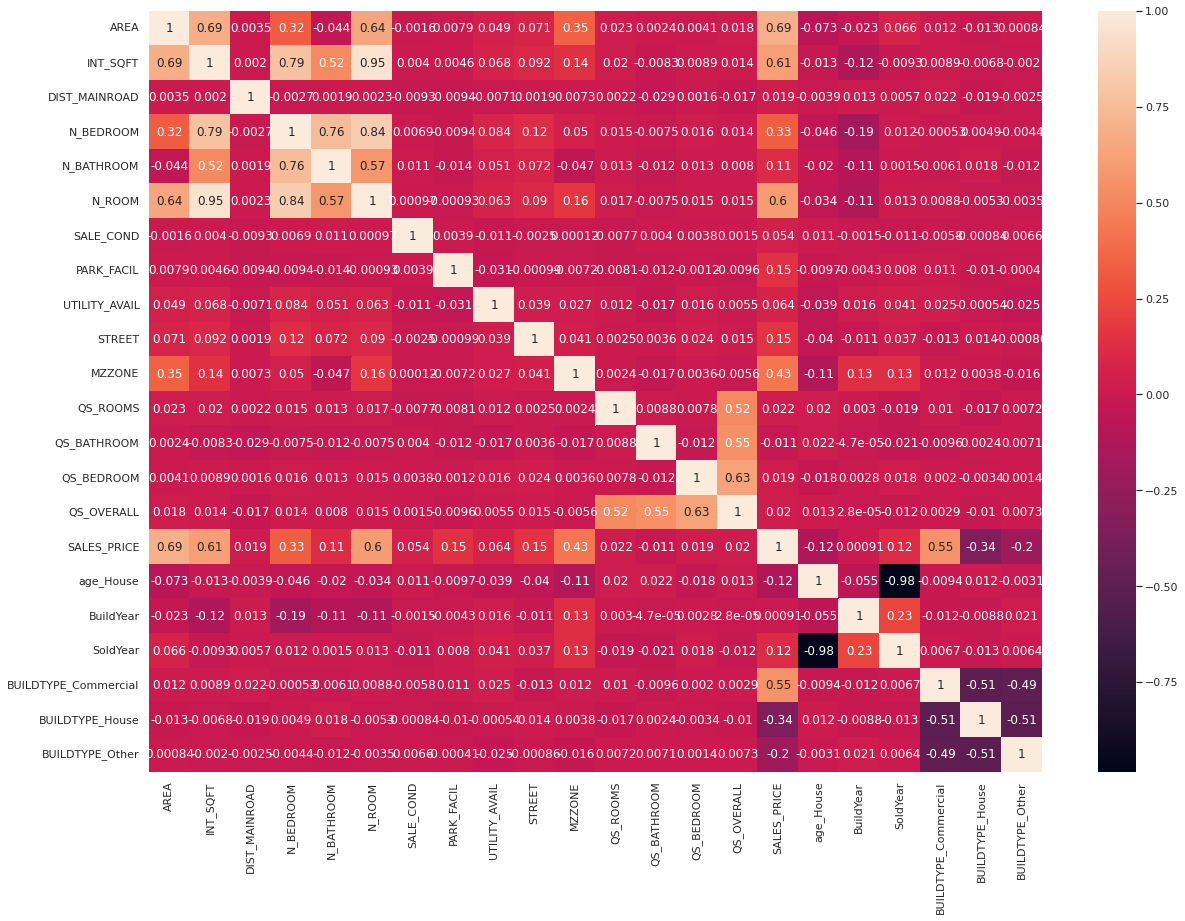

In [ ]:
plt.figure(figsize=(20,14))
cor=df.corr()
sns.heatmap(cor,annot=True)
plt.show()

* The feture shows up near by 1 has the postivie correlation
* The feture shows up near by 0 has the Negative correlation

## DROP THE COLUM WHICH IS NOT NEEDED FOR THE PREDICTION 

The below mentioned feature is not having impact on the target variable hence we are removing the same 
*   DIST MAINROAD
*   QS_BATHROOM         
*   QS_BEDROOM              
*   QS_OVERALL 
*   QS_ROOMS               













In [ ]:
df.drop(['DIST_MAINROAD','QS_ROOMS','QS_BATHROOM','QS_BEDROOM','QS_OVERALL'],axis=1,inplace=True)
df.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,age_House,BuildYear,SoldYear,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Other
0,1,1004,1,1,3,3,2,4,2,1,7600000,44,2011,1967,1,0,0
1,6,1986,2,1,5,3,1,4,3,4,21717770,11,2006,1995,1,0,0
2,2,909,1,1,3,3,2,1,3,5,13159200,20,2012,1992,1,0,0
3,4,1855,3,2,5,2,1,3,2,3,9630290,22,2010,1988,0,0,1
4,1,1226,1,1,3,3,2,4,3,2,7406250,30,2009,1979,0,0,1


In [ ]:
df.columns

Index(['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND',
       'PARK_FACIL', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'SALES_PRICE',
       'age_House', 'BuildYear', 'SoldYear', 'BUILDTYPE_Commercial',
       'BUILDTYPE_House', 'BUILDTYPE_Other'],
      dtype='object')

## SPLIT THE DATA

In [ ]:
X=df.drop(['SALES_PRICE'],axis=1).copy()
y=df['SALES_PRICE'].copy()
X.shape, y.shape

((7109, 16), (7109,))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, shuffle=True, random_state=47, test_size=0.2)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((5687, 16), (5687,), (1422, 16), (1422,))

## Feature Scalling
* its important the scale the features for parametric models

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
print(X_train)

[[ 1.86732609  0.59408023 -0.79436305 ... -0.68853456  1.36723221
  -0.70161189]
 [-1.37641981 -1.1846811  -0.79436305 ...  1.45235993 -0.73140465
  -0.70161189]
 [ 1.86732609  0.56348728 -0.79436305 ... -0.68853456 -0.73140465
   1.42528941]
 ...
 [ 0.24545314  0.35807749  0.45842194 ... -0.68853456 -0.73140465
   1.42528941]
 [-0.8357955  -0.97490089 -0.79436305 ...  1.45235993 -0.73140465
  -0.70161189]
 [ 0.78607745  2.04724519  2.9639919  ...  1.45235993 -0.73140465
  -0.70161189]]


In [ ]:
print(X_test)

[[ 0.24545314  1.22560605  1.71120692 ... -0.68853456  1.36723221
  -0.70161189]
 [-0.29517118 -0.55315527 -0.79436305 ... -0.68853456 -0.73140465
   1.42528941]
 [ 0.24545314  0.74923017  0.45842194 ... -0.68853456  1.36723221
  -0.70161189]
 ...
 [ 1.86732609  1.33268136  0.45842194 ...  1.45235993 -0.73140465
  -0.70161189]
 [ 0.78607745  1.22997647  1.71120692 ...  1.45235993 -0.73140465
  -0.70161189]
 [-0.29517118 -0.21444765  0.45842194 ...  1.45235993 -0.73140465
  -0.70161189]]


## ML MODEL Building

# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
lr= LinearRegression().fit(X_train, y_train)

#Prediction 
y_predict = lr.predict(X_test)

In [ ]:
from sklearn import metrics 

In [ ]:
lr_scoring = metrics.r2_score(y_test, y_predict)
lr_mean = metrics.mean_absolute_error(y_test, y_predict)
print("Training Score:  {:.2f}".format(lr.score(X_train, y_train)))
print("Test Score:  {:.2f}".format(lr.score(X_test, y_test)))

Training Score:  0.92
Test Score:  0.92


In [ ]:
print("R2 score value :{:.3f}".format(metrics.r2_score(y_test, y_predict)))
print("Mean Square Error :{:.2f}".format(metrics.mean_squared_error(y_test, y_predict)))
print("Mean Absolute Error :{:.2f}".format(metrics.mean_absolute_error(y_test, y_predict)))

R2 score value :0.921
Mean Square Error :1103853582713.91
Mean Absolute Error :802118.81


In [ ]:
lreg_predicted = pd.DataFrame({
    'actual':y_test,
    'predicted':y_predict.flatten()
})

In [ ]:
lreg_predicted.head(10)

,actual,predicted
3410,8905050,9.045042e+06
5610,10897710,1.043771e+07
72,8956480,9.618853e+06
4268,13197400,1.406503e+07
2399,20819590,1.816470e+07
661,12356960,1.285083e+07
3798,8344040,7.458707e+06
708,6298700,5.236797e+06
3464,19959560,1.844321e+07
2126,11515200,1.249431e+07


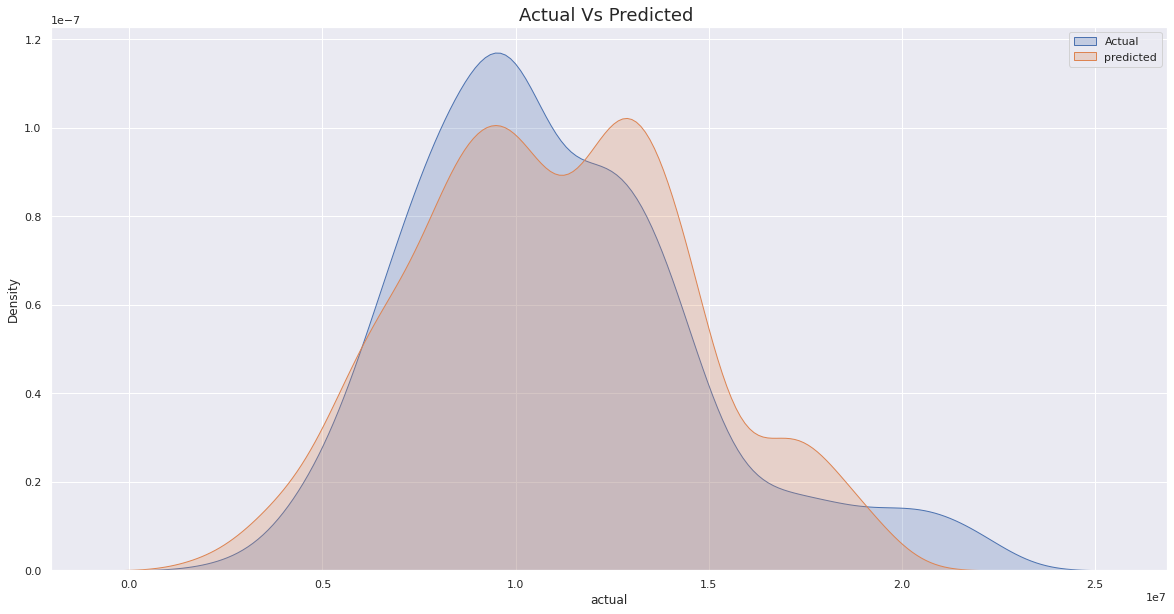

In [ ]:
plt.figure(figsize=(20,10))
plt.title("Actual Vs Predicted ", size=18)
sns.kdeplot(data=lreg_predicted,x='actual', label="Actual", shade=True)
sns.kdeplot(data=lreg_predicted,x='predicted', label="predicted", shade=True)
plt.legend()
plt.show()

* The Linear Regression model has r2 score value as 92% 
* The Actual Vs Predicted price more are less equal hence its good model to have to predict the sales price

## KNN REGRESSION 

In [ ]:
from sklearn.neighbors import KNeighborsRegressor


In [ ]:
knn_Reg = KNeighborsRegressor().fit(X_train,y_train)
knn_ypredict = knn_Reg.predict(X_test)

print("KNN Train Score: {:.2f}".format(knn_Reg.score(X_train,y_train)))
print("KNN Test Score: {:.2f}".format(knn_Reg.score(X_test,y_test)))

KNN Train Score: 0.96
KNN Test Score: 0.94


# KNN CORSS VALIDATION

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score, RepeatedKFold

In [ ]:
knn_search = GridSearchCV(estimator=KNeighborsRegressor(), param_grid=dict(n_neighbors=[2,5,10,15,20,24,26,28,30,]),cv=3)
knn_search.fit(X,y)


GridSearchCV(cv=3, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [2, 5, 10, 15, 20, 24, 26, 28, 30]})

In [ ]:
print("KNN best parameter", knn_search.best_params_)
print("KNN best Score", knn_search.best_score_)

KNN best parameter {'n_neighbors': 26}
KNN best Score 0.4198618934029737


In [ ]:
knn_Reg = KNeighborsRegressor(n_neighbors=26).fit(X_train,y_train)
knn_ypredict = knn_Reg.predict(X_test)
knn_scoring=metrics.r2_score(y_test, knn_ypredict)
knn_mean= metrics.mean_absolute_error(y_test, knn_ypredict)

print("KNN Train Score: {:.2f}".format(knn_Reg.score(X_train,y_train)))
print("KNN Test Score: {:.2f}".format(knn_Reg.score(X_test,y_test)))
print("KNN Scoring is :{:.2f}".format(knn_scoring))

KNN Train Score: 0.93
KNN Test Score: 0.92
KNN Scoring is :0.92


## DECISION TREE REGRESSION

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dt_Reg = DecisionTreeRegressor(max_depth=7).fit(X_train, y_train)
dt_y_predict = dt_Reg.predict(X_test)


In [ ]:
dt_scoring = metrics.r2_score(y_test, y_predict)
dt_mean = metrics.mean_absolute_error(y_test, y_predict)
print("DT Training Score:  {:.2f}".format(dt_Reg.score(X_train, y_train)))
print("DT Test Score:  {:.2f}".format(dt_Reg.score(X_test, y_test)))

DT Training Score:  0.96
DT Test Score:  0.95


In [ ]:
print("DT R2 score value :{:.3f}".format(metrics.r2_score(y_test, dt_y_predict)))
print("DT Mean Square Error :{:.2f}".format(metrics.mean_squared_error(y_test, dt_y_predict)))
print("DT Mean Absolute Error :{:.2f}".format(metrics.mean_absolute_error(y_test, dt_y_predict)))

DT R2 score value :0.947
DT Mean Square Error :737168953024.89
DT Mean Absolute Error :692290.65


In [ ]:
dt_reg_predicted = pd.DataFrame({
    'actual':y_test,
    'predicted':dt_y_predict.flatten()
})


In [ ]:
dt_reg_predicted.head(15)

,actual,predicted
3410,8905050,8.466949e+06
5610,10897710,9.963292e+06
72,8956480,1.085277e+07
4268,13197400,1.171397e+07
2399,20819590,2.167911e+07
661,12356960,1.259746e+07
3798,8344040,7.903672e+06
708,6298700,6.991802e+06
3464,19959560,1.852064e+07
2126,11515200,1.346861e+07


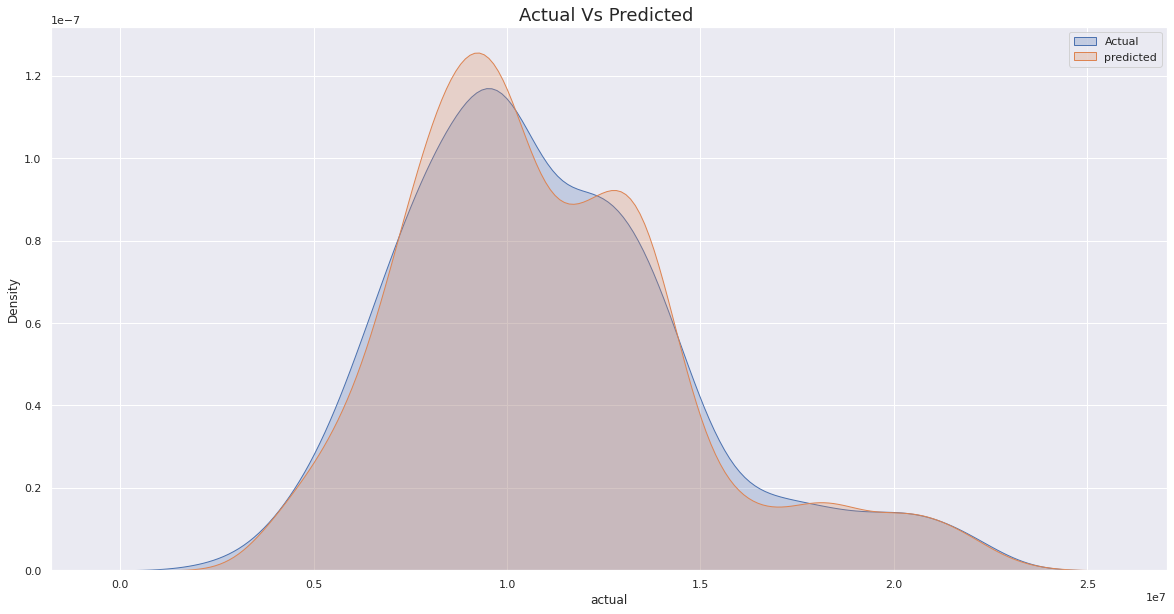

In [ ]:
plt.figure(figsize=(20,10))
plt.title("Actual Vs Predicted ", size=18)
sns.kdeplot(data=dt_reg_predicted,x='actual', label="Actual", shade=True)
sns.kdeplot(data=dt_reg_predicted,x='predicted', label="predicted", shade=True)
plt.legend()
plt.show()

* The Decision Tree Regression Actual vs predicted values nearly to each other hence decision tree has better prediction model as well 

## Random Forest Regression 

In [ ]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

In [ ]:
rf_Reg = RandomForestRegressor(random_state=0).fit(X_train, y_train)
ranfor_y_predict = rf_Reg.predict(X_test)

In [ ]:
rf_scoring = metrics.r2_score(y_test, ranfor_y_predict)
rf_mean = metrics.mean_absolute_error(y_test, ranfor_y_predict)
print("RF Training Score:  {:.2f}".format(rf_Reg.score(X_train, y_train)))
print("RF Test Score:  {:.2f}".format(rf_Reg.score(X_test, y_test)))

RF Training Score:  1.00
RF Test Score:  0.99


In [ ]:
print("RF R2 score value :{:.3f}".format(metrics.r2_score(y_test, ranfor_y_predict)))
print("RF Mean Square Error :{:.2f}".format(metrics.mean_squared_error(y_test, ranfor_y_predict)))
print("RF Mean Absolute Error :{:.2f}".format(metrics.mean_absolute_error(y_test, ranfor_y_predict)))

RF R2 score value :0.988
RF Mean Square Error :168468139658.14
RF Mean Absolute Error :320684.79


* Random Forest regressor has more scoring value than the desicion tree 
* R2 score is 99%

In [ ]:
rf_reg_predicted = pd.DataFrame({
    'actual':y_test,
    'predicted':ranfor_y_predict.flatten()
})


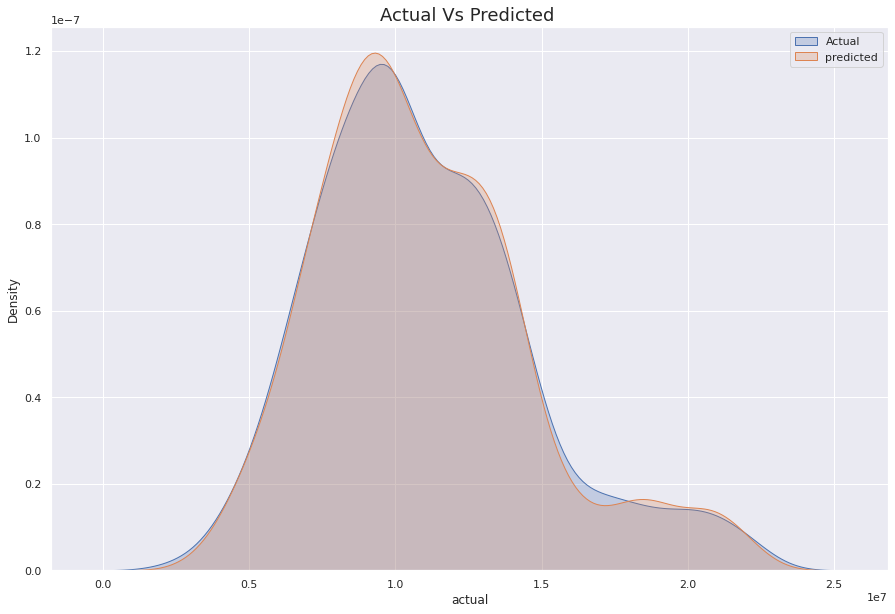

In [ ]:
plt.figure(figsize=(15,10))
plt.title("Actual Vs Predicted ", size=18)
sns.kdeplot(data=rf_reg_predicted,x='actual', label="Actual", shade=True)
sns.kdeplot(data=rf_reg_predicted,x='predicted', label="predicted", shade=True)
plt.legend()
plt.show()

* From the graph, its clear that actual and Predicted are more are less equal 
* Looks likes Random forest prediction is better than any other model

## ADA BOOST REGRESSION

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
ada_Reg = AdaBoostRegressor(random_state=1).fit(X_train, y_train)
ada_y_predict = ada_Reg.predict(X_test)

In [ ]:
ada_scoring = metrics.r2_score(y_test, ada_y_predict)
ada_mean = metrics.mean_absolute_error(y_test, ada_y_predict)
print("RF Training Score:  {:.2f}".format(ada_Reg.score(X_train, y_train)))
print("RF Test Score:  {:.2f}".format(ada_Reg.score(X_test, y_test)))

RF Training Score:  0.93
RF Test Score:  0.92


In [ ]:
print("ADA R2 score value :{:.3f}".format(metrics.r2_score(y_test, ada_y_predict)))
print("ADA Mean Square Error :{:.2f}".format(metrics.mean_squared_error(y_test, ada_y_predict)))
print("ADA Mean Absolute Error :{:.2f}".format(metrics.mean_absolute_error(y_test, ada_y_predict)))

ADA R2 score value :0.921
ADA Mean Square Error :1105704182166.20
ADA Mean Absolute Error :852106.21


In [ ]:
ada_reg_predicted = pd.DataFrame({
    'actual':y_test,
    'predicted':ada_y_predict.flatten()
})

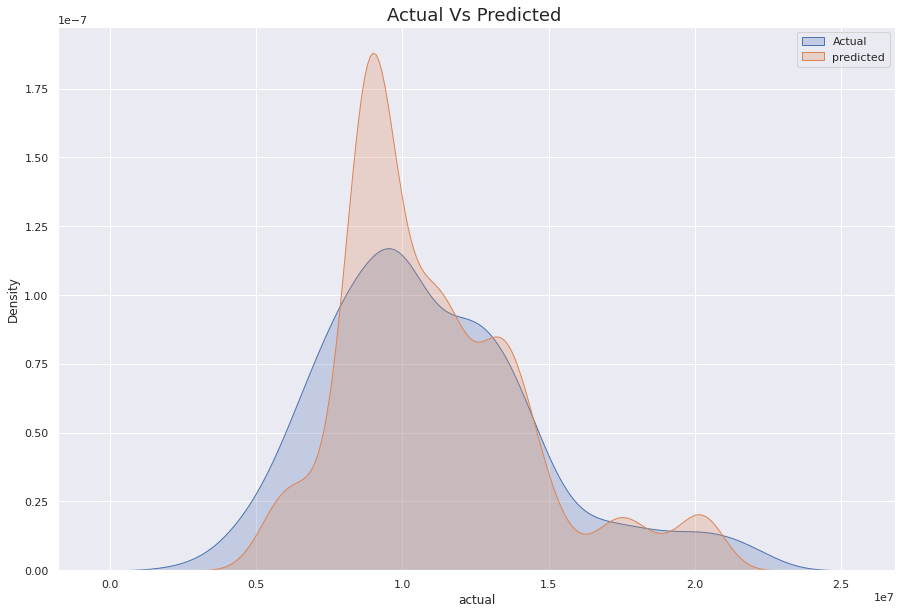

In [ ]:
plt.figure(figsize=(15,10))
plt.title("Actual Vs Predicted ", size=18)
sns.kdeplot(data=ada_reg_predicted,x='actual', label="Actual", shade=True)
sns.kdeplot(data=ada_reg_predicted,x='predicted', label="predicted", shade=True)
plt.legend()
plt.show()

* The model score was good but compartively some other model performing better than this

## XgBOOST REGRESSION

In [ ]:
from xgboost import XGBRegressor

In [ ]:
xg_Reg = XGBRegressor().fit(X_train, y_train)

[19:34:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
xcg_y_predict = xg_Reg.predict(X_test)

In [ ]:
xcg_scoring = metrics.r2_score(y_test, xcg_y_predict)
xcg_mean = metrics.mean_absolute_error(y_test, xcg_y_predict)
print("XCG BOOST Training Score:  {:.2f}".format(xg_Reg.score(X_train, y_train)))
print("XCG BOOST Test Score:  {:.2f}".format(xg_Reg.score(X_test, y_test)))

XCG BOOST Training Score:  0.99
XCG BOOST Test Score:  0.99


In [ ]:
print("XCG BOOST R2 score value :{:.3f}".format(metrics.r2_score(y_test, xcg_y_predict)))
print("XCG BOOST Mean Square Error :{:.2f}".format(metrics.mean_squared_error(y_test, xcg_y_predict)))
print("XCG BOOST Mean Absolute Error :{:.2f}".format(metrics.mean_absolute_error(y_test, xcg_y_predict)))

XCG BOOST R2 score value :0.990
XCG BOOST Mean Square Error :141809463284.54
XCG BOOST Mean Absolute Error :287304.26


In [ ]:
xcg_reg_predicted = pd.DataFrame({
    'actual':y_test,
    'predicted':xcg_y_predict.flatten()
})
xcg_reg_predicted.head(20)

,actual,predicted
3410,8905050,8606376.0
5610,10897710,10596316.0
72,8956480,9640554.0
4268,13197400,12942288.0
2399,20819590,20362128.0
661,12356960,12372568.0
3798,8344040,8367008.5
708,6298700,6765699.0
3464,19959560,19071752.0
2126,11515200,12088576.0


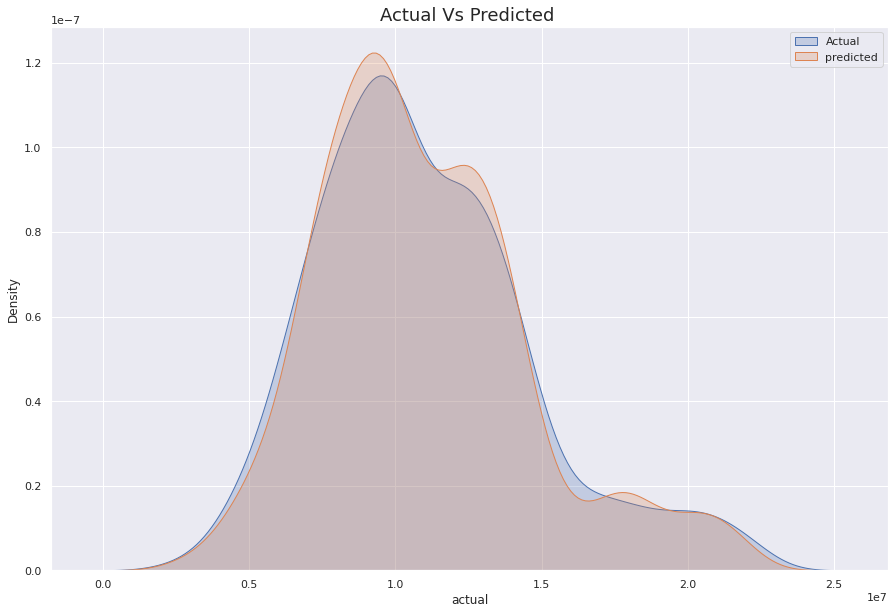

In [ ]:
plt.figure(figsize=(15,10))
plt.title("Actual Vs Predicted ", size=18)
sns.kdeplot(data=xcg_reg_predicted,x='actual', label="Actual", shade=True)
sns.kdeplot(data=xcg_reg_predicted,x='predicted', label="predicted", shade=True)
plt.legend()
plt.show()

In [ ]:
#CROSS VaLidations :
from sklearn.model_selection import cross_validate
regressor = LinearRegression(normalize = True) 



In [ ]:
cv_results = cross_validate(regressor, X, y, cv=10, scoring = "r2")
cv_results['test_score'].mean()

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pi

0.922527015037409

## Comparing All the MODEL TOGETHER

In [ ]:
all_models =pd.DataFrame({"model":"LinearReg KNNReg DecisionTreeReg RandomForestReg AdaBoostReg xgBoostReg".split(),
                         "r2_Score":[lr_scoring,knn_scoring,dt_scoring,rf_scoring,ada_scoring,xcg_scoring],
                         "Mean":[lr_mean,knn_mean,dt_mean,rf_mean,ada_mean,xcg_mean]})

In [ ]:

all_models

,model,r2_Score,Mean
0,LinearReg,0.921337,802118.807291
1,KNNReg,0.919663,839350.608433
2,DecisionTreeReg,0.921337,802118.807291
3,RandomForestReg,0.987995,320684.791772
4,AdaBoostReg,0.921205,852106.206525
5,xgBoostReg,0.989894,287304.262482


* Out of all the models, xgBoost and RandomForest has better Prediction score for House price

In [ ]:
xcgb=XGBRegressor(n_estimators=100)
xcgb.fit(X_train, y_train)


[19:34:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
xcgb.feature_importances_

array([0.22705528, 0.06637134, 0.01849286, 0.00070589, 0.24100007,
       0.0044667 , 0.02164606, 0.00157038, 0.01343644, 0.05097769,
       0.00261228, 0.        , 0.00308779, 0.325436  , 0.02314121,
       0.        ], dtype=float32)

In [ ]:
feature_scoring = pd.Series(xcgb.feature_importances_, index=X.columns).sort_values(ascending=False)

In [ ]:
feature_scoring

BUILDTYPE_Commercial    0.325436
N_ROOM                  0.241000
AREA                    0.227055
INT_SQFT                0.066371
MZZONE                  0.050978
BUILDTYPE_House         0.023141
PARK_FACIL              0.021646
N_BEDROOM               0.018493
STREET                  0.013436
SALE_COND               0.004467
SoldYear                0.003088
age_House               0.002612
UTILITY_AVAIL           0.001570
N_BATHROOM              0.000706
BuildYear               0.000000
BUILDTYPE_Other         0.000000
dtype: float32

* Area is the most importance feature
* BuildType is the second most important feature
* Int square feet is the third mose important feature
* Zone is the fourth important feature and so on


# Feature Importance Plot

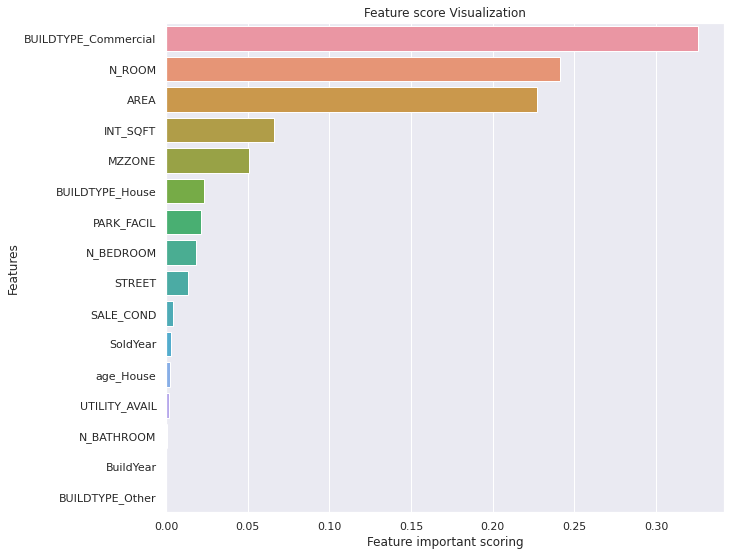

In [ ]:
f, ax =plt.subplots(figsize=(10,9))
ax=sns.barplot(x=feature_scoring,y=feature_scoring.index)
ax.set_title("Feature score Visualization")
ax.set_xlabel("Feature important scoring")
ax.set_ylabel("Features")
plt.show()

* For real estate Developer below is the Key take away
* AREA is the important thing for the real estate developer 
> T nagar is the most important Area to build to get good sales price

* BUILDTYPE is the second important feature 
> Commercial spaces are getting higher sales price 
* Building more square leading more sales price
* Parking Faciltiy gives more sales price






## forecast Range

* Standard devication of the actual Price used in the mode was "3746017"
* hence the Upper Range Between Actual Predicted price falls between 3746017 means it will be like plus or Minus of the SD
* here I added the Upper Range as well as Lower Range to suggest the user

In [551]:
xcg_reg_predicted['UpperRange']=xcg_reg_predicted['predicted']+3746017

In [553]:
xcg_reg_predicted['LowerRange']=xcg_reg_predicted['predicted']-3746017

In [554]:
xcg_reg_predicted.head()

,actual,predicted,UpperRange,LowerRange
3410,8905050,8606376.0,12352393.0,4860359.0
5610,10897710,10596316.0,14342333.0,6850299.0
72,8956480,9640554.0,13386571.0,5894537.0
4268,13197400,12942288.0,16688305.0,9196271.0
2399,20819590,20362128.0,24108146.0,16616111.0
